Citation

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")

Ler o arquivo csv:

In [3]:
df = pd.read_csv('heart.csv')

# Análise Exploratória

In [4]:
df.shape

(918, 12)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Segundo o dicionário do dataset a coluna 'FastingBS' reflete um valor verdadeiro ou falso portanto mudaremos seu tipo para object

Depois crio uma lista com os nomes das colunas separadas em numéricas e categóricas

In [7]:
df['FastingBS'] = df['FastingBS'].astype('object')
catcols = df.select_dtypes(include=['object']).columns.tolist()
numcols = df.drop(columns = 'HeartDisease').select_dtypes(include=['int64', 'float64']).columns.tolist()

In [8]:
catcols

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

In [9]:
numcols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [10]:
ProfileReport(df, title = 'Heart Indicators').to_file('corprofile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

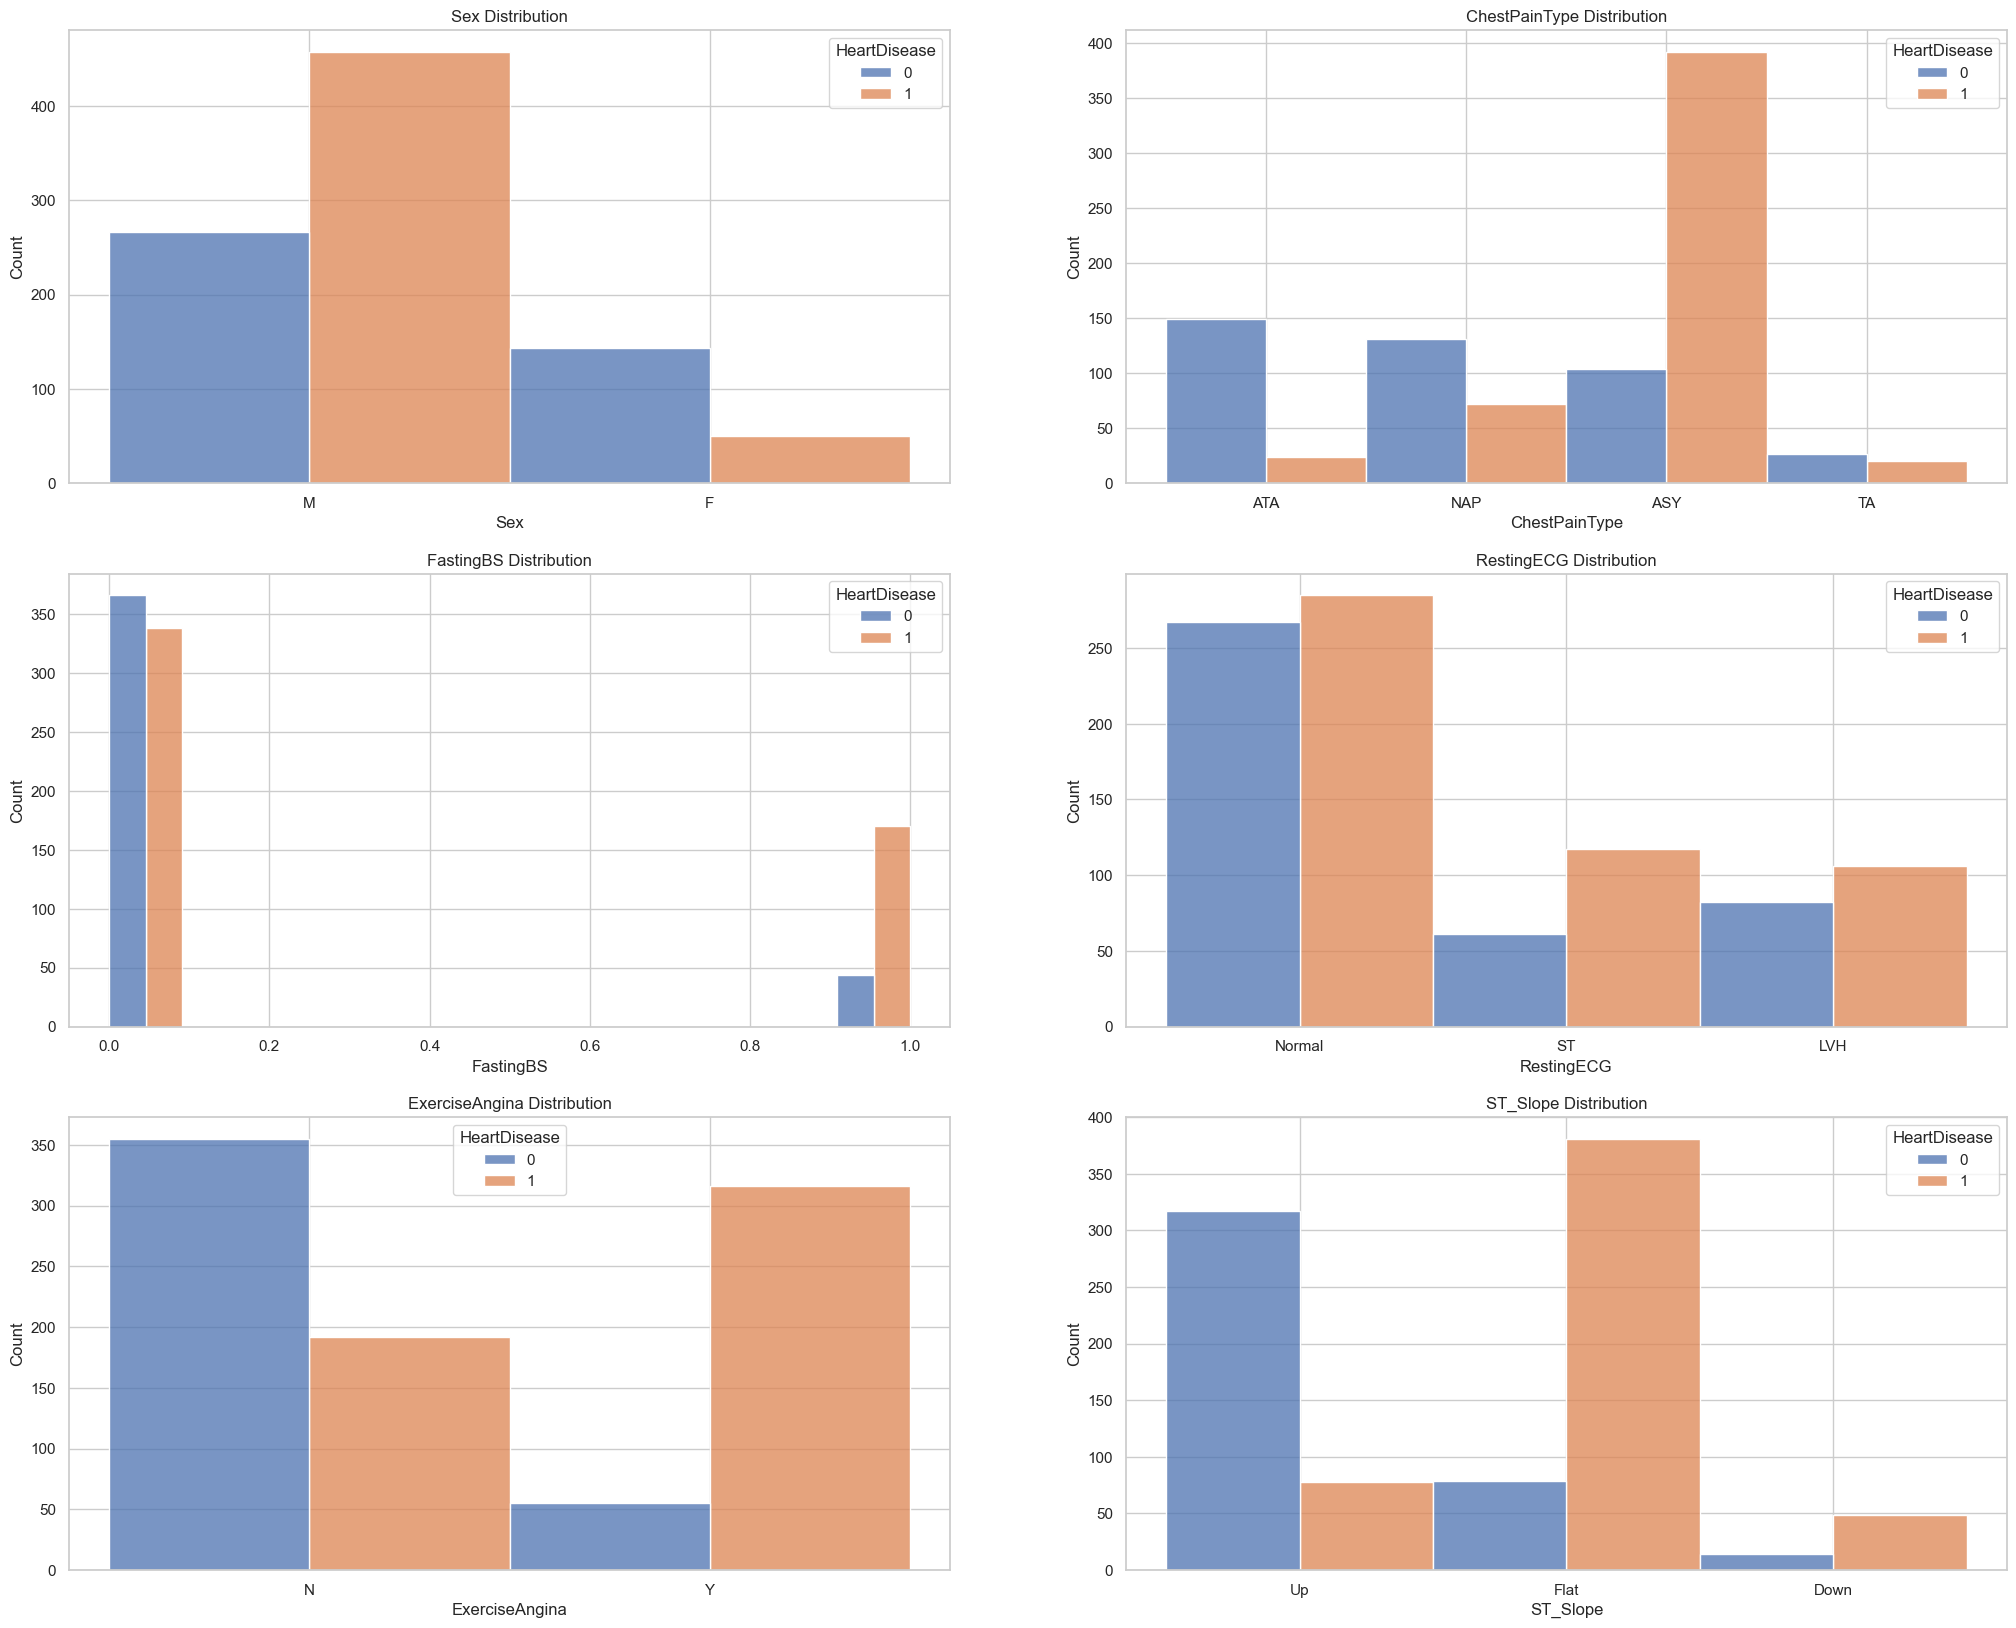

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (25,20))

for idx,column in enumerate(catcols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x = column, hue='HeartDisease', data = df, multiple = 'dodge')
    plt.title("{} Distribution" .format(column))

In [12]:
(len(df[(df['HeartDisease'] == 1) & (df['ChestPainType'] == 'ASY')]))/(len(df[df['HeartDisease'] == 1])) #Porcentagem de assintomáticos

0.7716535433070866

In [13]:
(len(df[(df['HeartDisease'] == 1) & (df['ChestPainType'] == 'NAP')]))/(len(df[df['HeartDisease'] == 1])) #Porcentagem com sintomas diferentes de dor no peito

0.14173228346456693

In [14]:
(len(df[(df['HeartDisease'] == 1) & (df['RestingECG'] == 'Normal')]))/(len(df[df['HeartDisease'] == 1])) #Porcentagem com ECG normal

0.5610236220472441

In [15]:
(len(df[(df['HeartDisease'] == 1) & (df['ExerciseAngina'] == 'Y')]))/(len(df[df['HeartDisease'] == 1])) #Porcentagem com dor no peito induzida por exercícios físicos

0.6220472440944882

## Alguns apontamentos sobre os dados categóricos:

- Existem mais homens que mulheres no dataset, os quais representam a maior parte dos pacientes com insuficiência cardíaca

- As colunas *Sex*, *FastingBS* e *ExerciseAngina* apresentam dados binários

- 77,16% dos pacientes com insuficiência cardíaca são assintomáticos

- 14,17% dos pacientes com insuficiência cardíaca apresentam outros sintomas que não dor no peito

- 56,10% dos pacientes com insuficiência cardíaca apresentam ECG normal

- 62,20% dos pacientes com insuficiência cardíaca apresentam dor no peito induzida por exercícios físicos

- As colunas *ChestPainType* e *ST_Slope* possuem correlação alta pra média com a coluna *HeartDisease* (0,621 e 0,538 respectivamente)

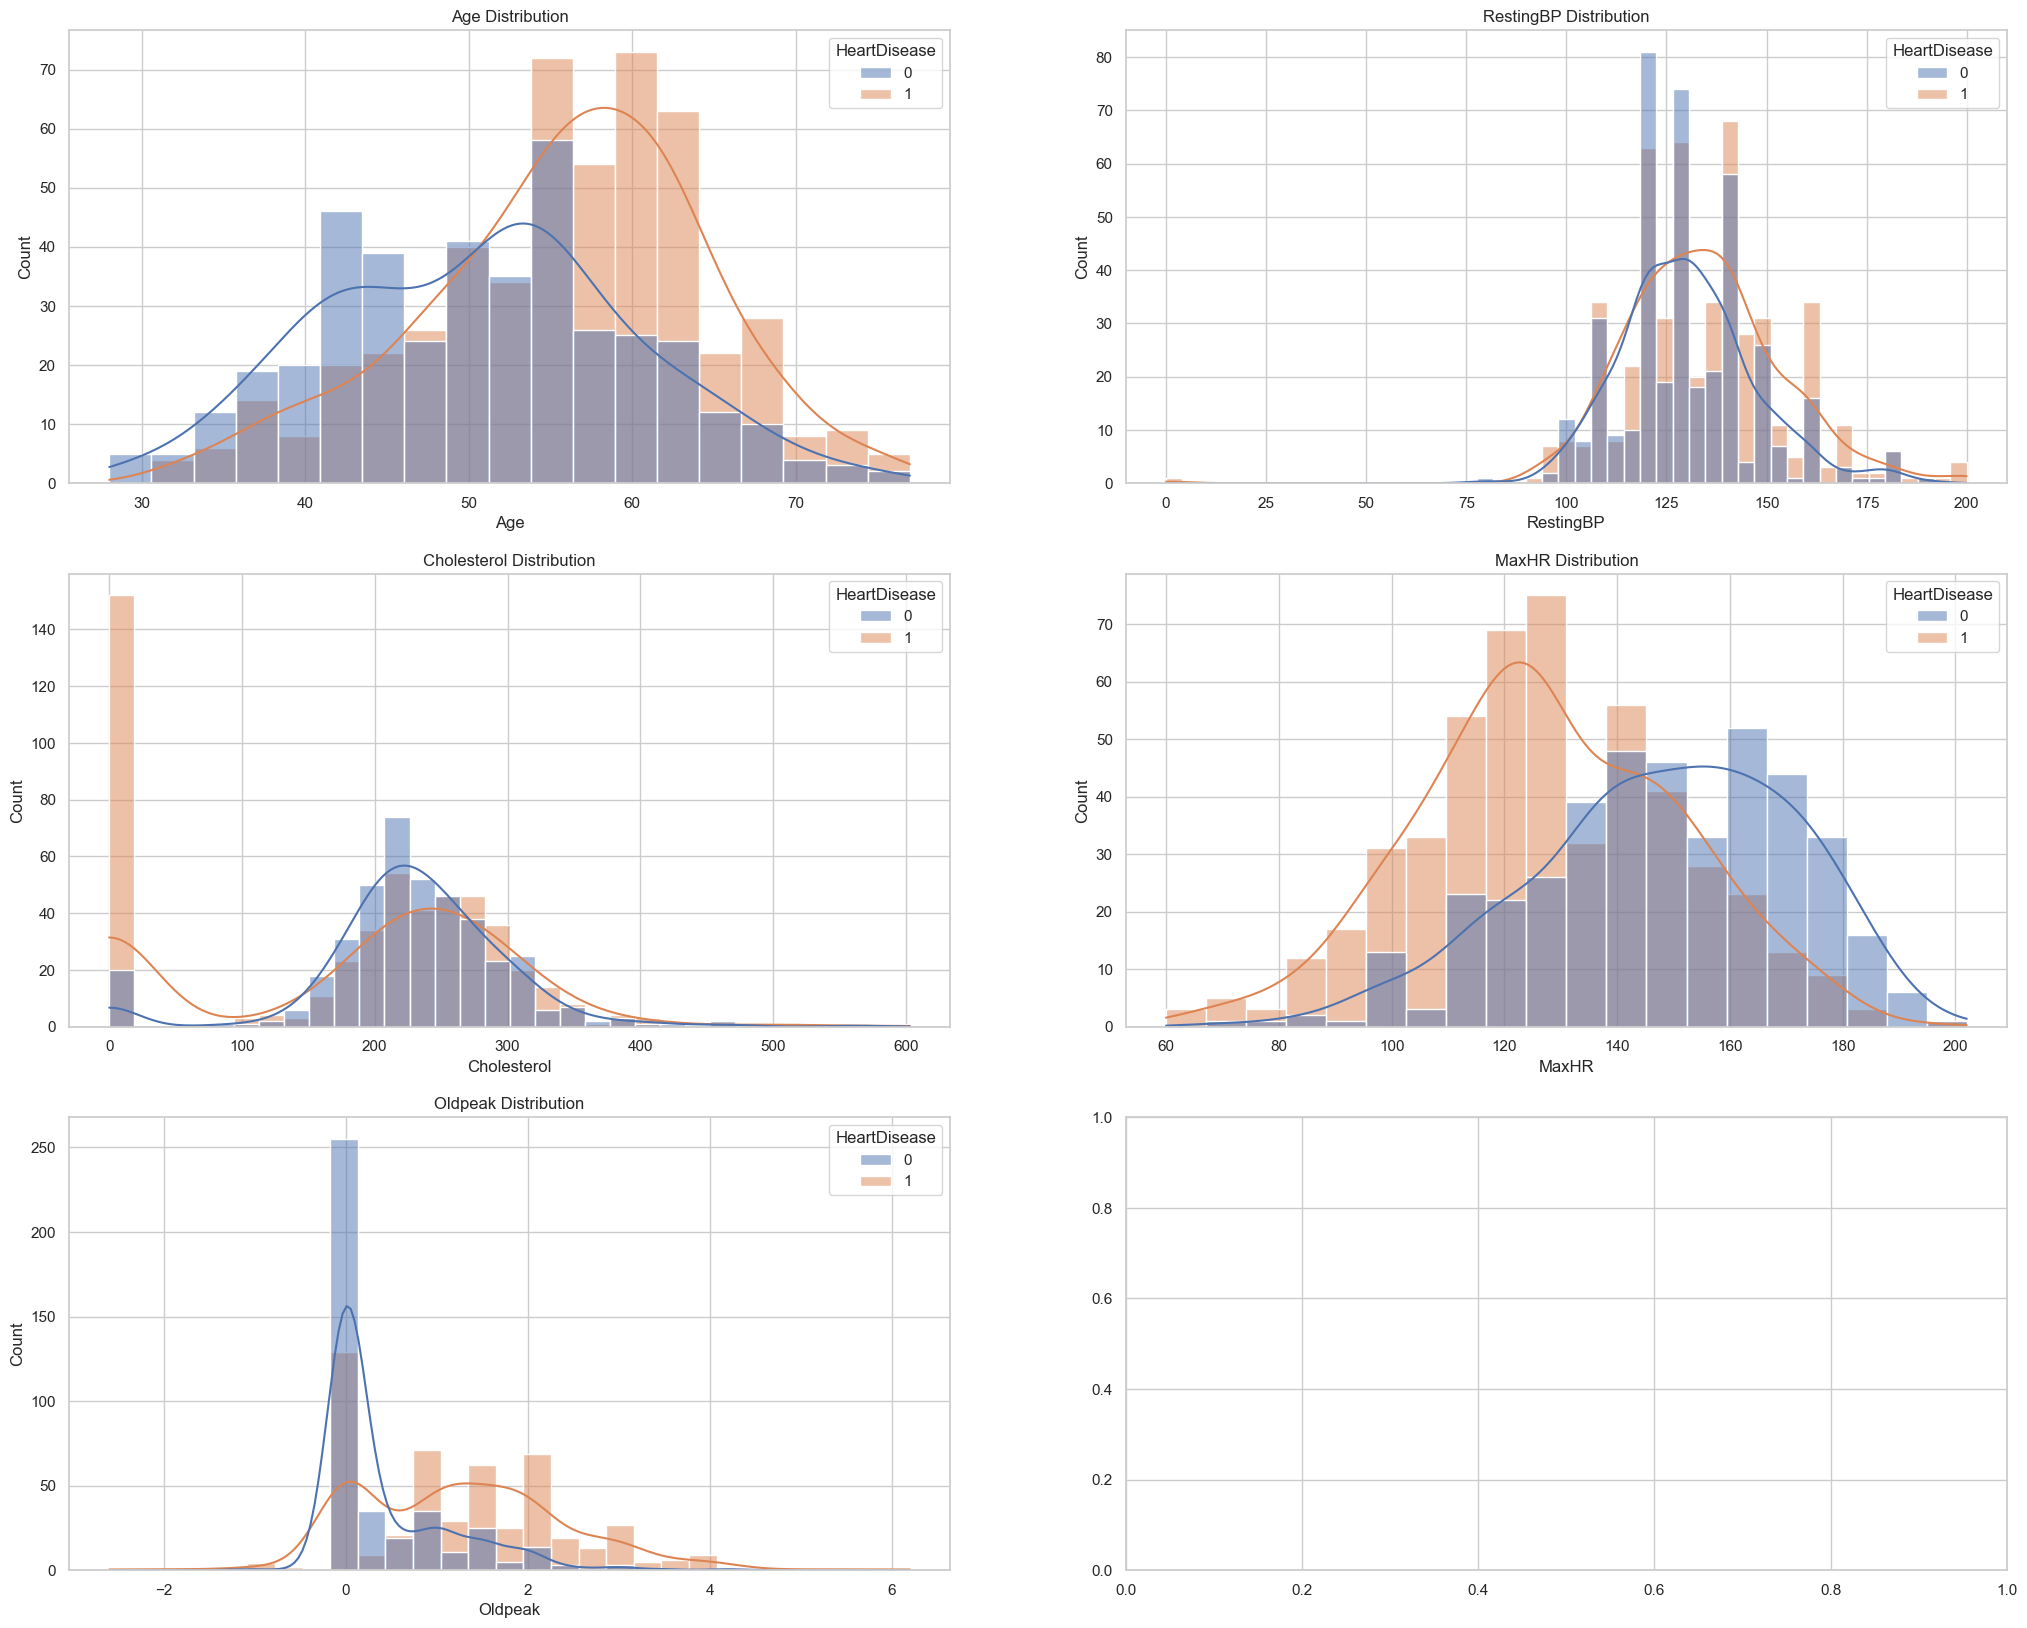

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (25,20))

for idx,column in enumerate(numcols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x = column, hue='HeartDisease', data = df.sort_values(by = column), kde = True)
    plt.title("{} Distribution" .format(column))

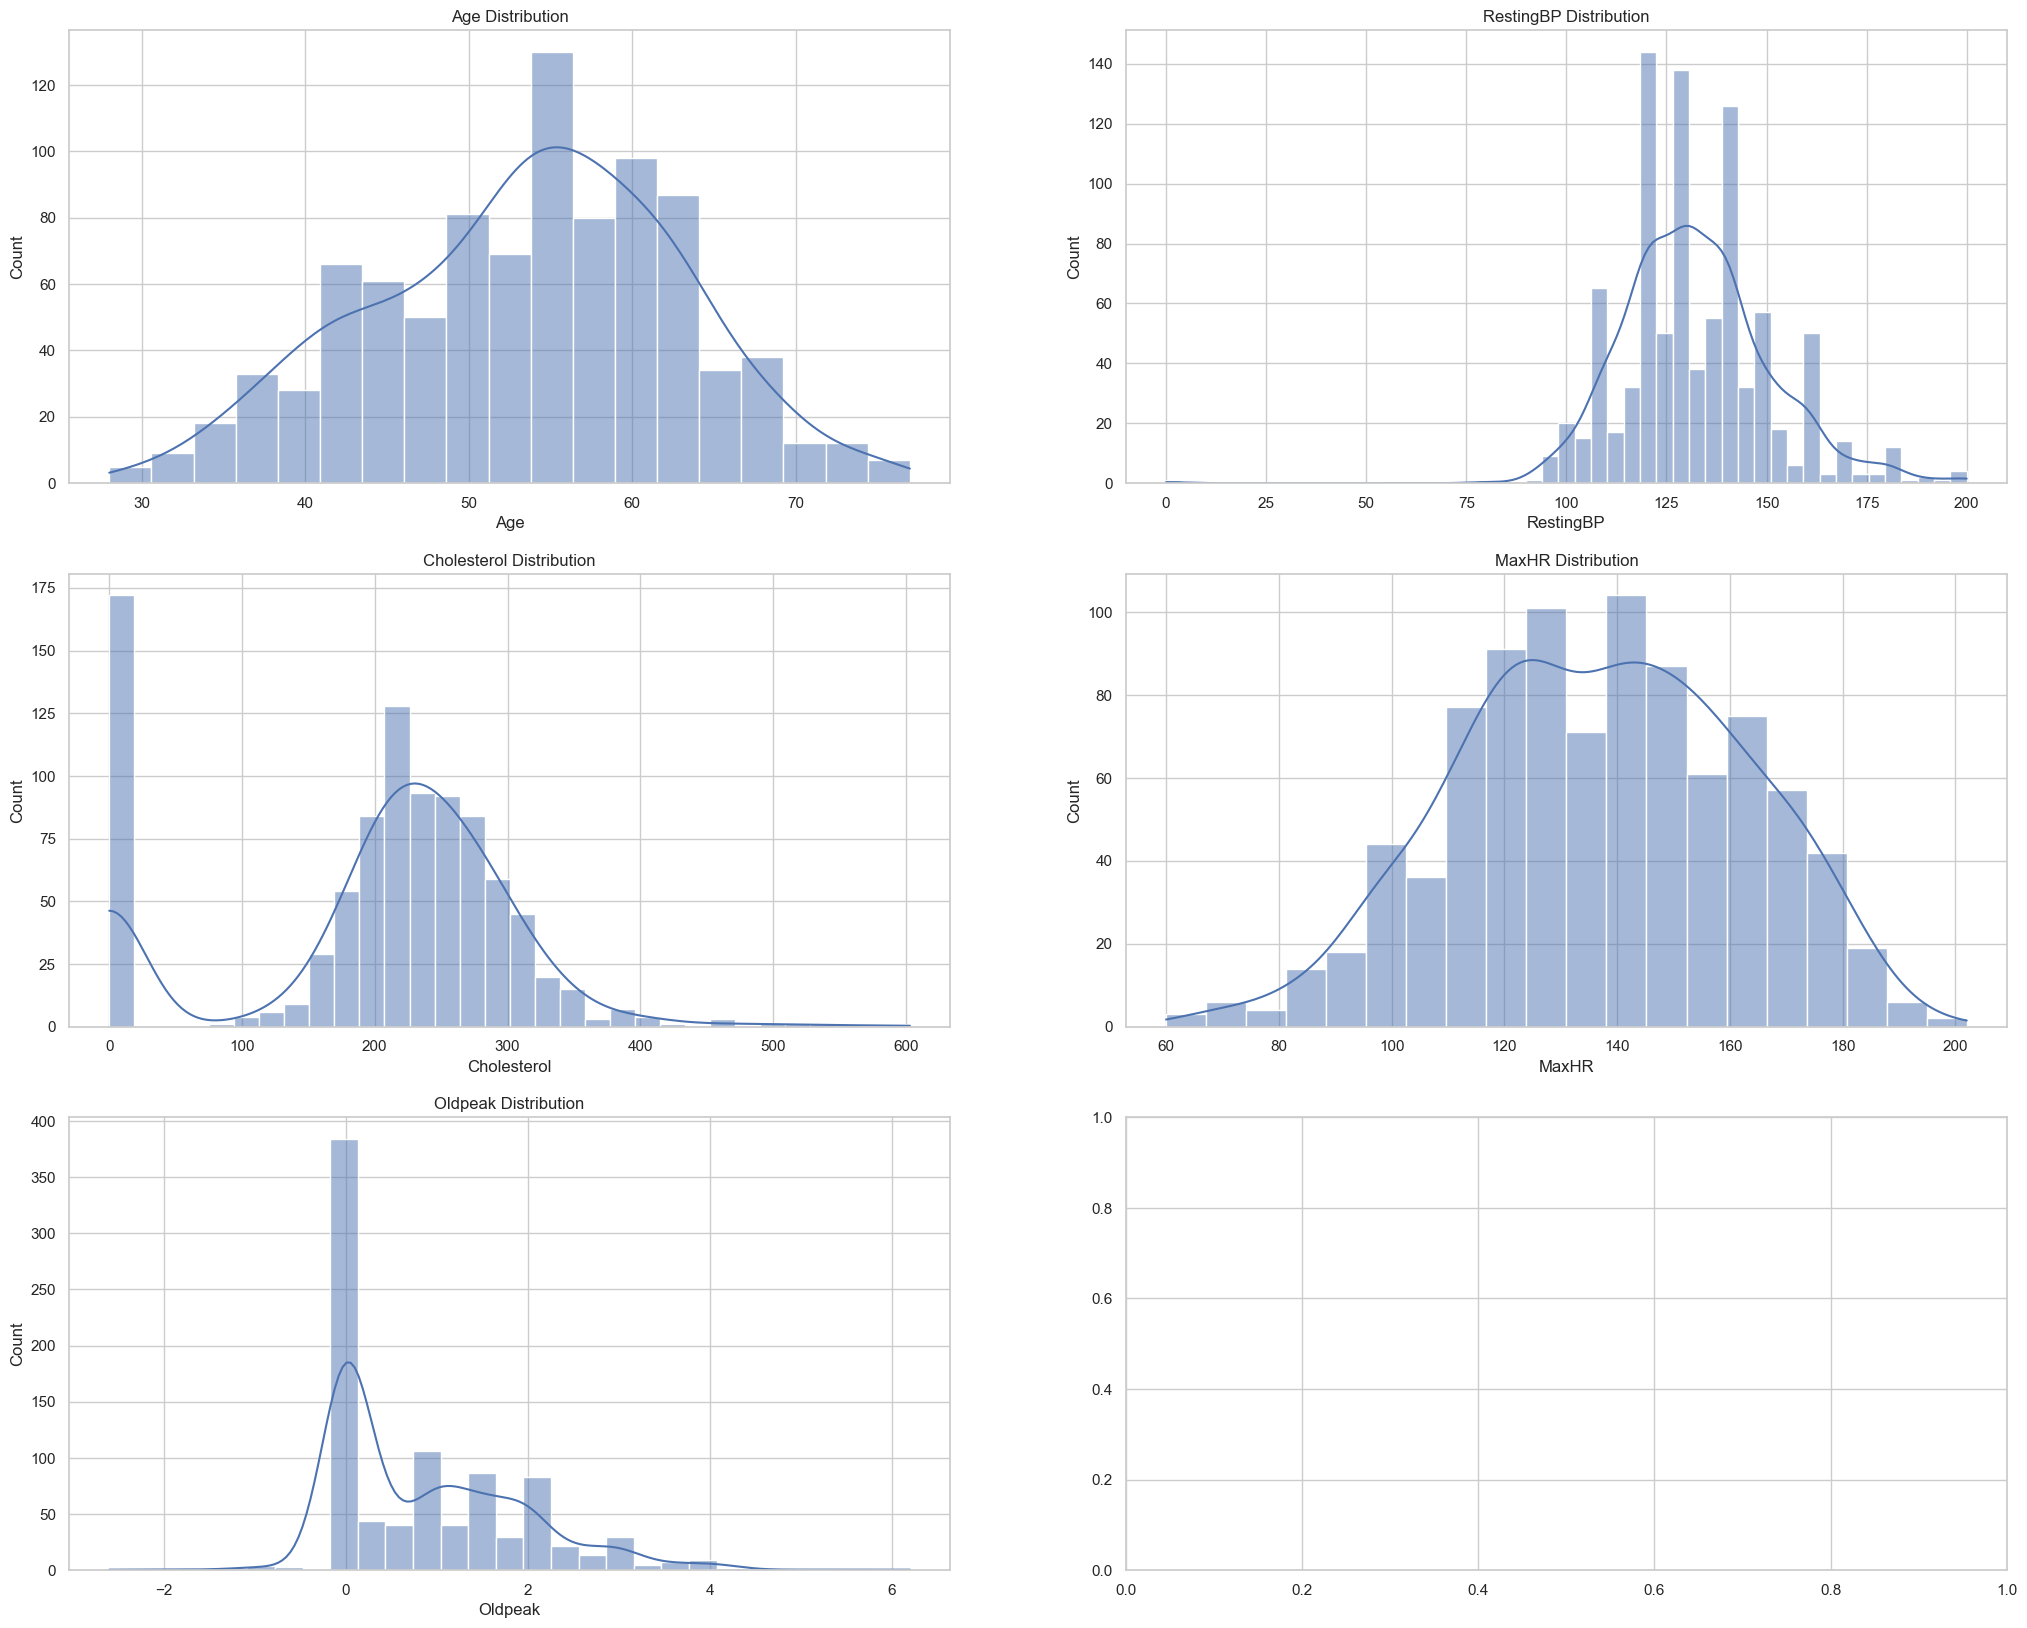

In [18]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (25,20))

for idx,column in enumerate(numcols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x = column, data = df.sort_values(by = column), kde = True)
    plt.title("{} Distribution" .format(column))

In [20]:
(len(df[(df['HeartDisease'] == 1) & (df['Cholesterol'] == 0 )]))/(len(df[df['HeartDisease'] == 1])) 
#Porcentagem de pacientes com 0 como valor de colesterol e COM insuficiência cardíaca

0.2992125984251969

In [21]:
(len(df[(df['HeartDisease'] == 0) & (df['Cholesterol'] == 0 )]))/(len(df[df['HeartDisease'] == 1]))
#Porcentagem de pacientes com 0 como valor de colesterol e SEM insuficiência cardíaca

0.03937007874015748

## Alguns apontamentos sobre os dados numéricos:
- Pacientes sem doenças cardíacas apresentam maiores valores de *MaxHR*

- 40,1% da coluna *Oldpeak* são zeros

- 18,7% da coluna *Cholesterol* são zeros (29,9%)

- A distribuição dos valores de pressão sanguínea em repouso são similares para pacientes com e sem doenças cardíacas

# Machine Learning

Separamos os dados em teste e treino(excluindo a coluna *Cholesterol* por possuir muitos valores 0):

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Cholesterol', 'HeartDisease']), df['HeartDisease'], test_size = 0.3, random_state = 42)

Transforma os dados:

In [20]:
num_transformer = Pipeline(steps = [('minmax', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('oh-encoder', OneHotEncoder())])

In [21]:
transformer = [('num', num_transformer, ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']), 
               ('cat', cat_transformer, ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])]
preprocessor = ColumnTransformer(transformers = transformer)

Cria o modelo:

In [22]:
model = Pipeline(steps = [('preprocessor', preprocessor), 
                          ('clf', LogisticRegression())])

Treina o modelo:

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('oh-encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('clf', LogisticRegression())])

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



Text(47.25, 0.5, 'Actual')

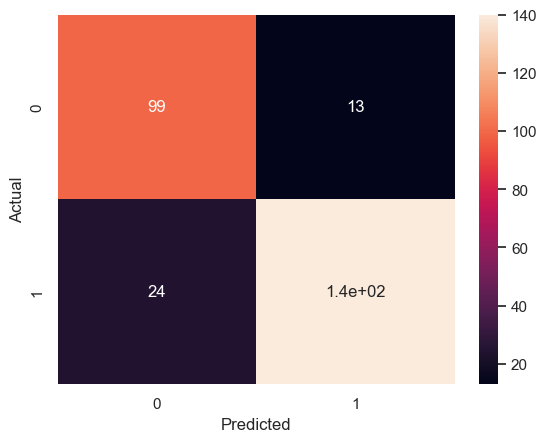

In [26]:
confusion_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_lr, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

Vamos testar agora o modelo incluindo a coluna *Cholesterol* porém, excluindo os valores 0 que indicam uma não medição de colesterol

In [27]:
df1 = df[df['Cholesterol'] != 0]

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1.drop(columns = ['HeartDisease']), df1['HeartDisease'], test_size = 0.3, random_state = 42)

In [29]:
transformer1 = [('num', num_transformer, ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']), 
               ('cat', cat_transformer, ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])]
preprocessor1 = ColumnTransformer(transformers = transformer1)

In [30]:
model1 = Pipeline(steps = [('preprocessor', preprocessor1), 
                          ('clf', LogisticRegression())])

In [31]:
model1.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('oh-encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('clf'

In [32]:
y1_pred = model1.predict(X1_test)

In [33]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       111
           1       0.88      0.87      0.88       113

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224



Observamos que:
- apesar da precisão de valores 1 ter caído 5% a precisão para valores 0 subiu 7%
- recall subiu 2% para valores 1 e se manteve para valores 0
- a inclusão da nova feature aumentou a acurácia de 87% para 88%

Assim, a feature *Cholesterol* deixa mais equilibrado o modelo, aumenta seu desempenho geral porém diminui a precisão
de verdadeiros positivos, o que pode ser uma desvangatem

Text(47.25, 0.5, 'Actual')

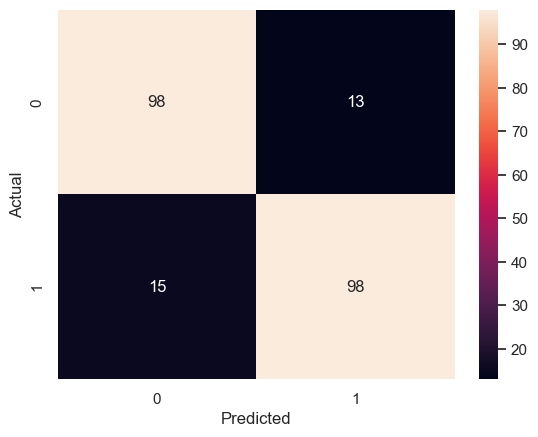

In [34]:
confusion_lr = confusion_matrix(y1_test, y1_pred)
sns.heatmap(confusion_lr, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

A seguir testamos o StandarScaler em vez do MinMaxScaler

In [35]:
num1_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [36]:
transformer2 = [('num', num1_transformer, ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']), 
               ('cat', cat_transformer, ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])]
preprocessor2 = ColumnTransformer(transformers = transformer2)

In [37]:
model2 = Pipeline(steps = [('preprocessor', preprocessor2), 
                          ('clf', LogisticRegression())])

In [38]:
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('oh-encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('clf', LogisticRegression())])

In [39]:
y2_pred = model2.predict(X_test)

In [40]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



A mudança de método de preprocessamento causou uma modificação mínima no modelo, fazendo o método MinMaxScaler equivalente ao StandarScaler nesse modelo.

Abaixo testaremos outro modelo, o chamado **Suport Vector Machine**

Para treinar o modelo não usaremos os dados em que a coluna *Cholesterol* tem valor 0

In [54]:
model3 = Pipeline(steps = [('preprocessor', preprocessor1), 
                          ('clf', svm.SVC(kernel = 'rbf'))])

model4 = Pipeline(steps = [('preprocessor', preprocessor1), 
                          ('clf', svm.SVC(kernel = 'linear'))])

model5 = Pipeline(steps = [('preprocessor', preprocessor1), 
                          ('clf', svm.SVC(kernel = 'poly'))])

model6 = Pipeline(steps = [('preprocessor', preprocessor1), 
                          ('clf', svm.SVC(kernel = 'sigmoid'))])

In [55]:
model3.fit(X1_train, y1_train)
model4.fit(X1_train, y1_train)
model5.fit(X1_train, y1_train)
model6.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('oh-encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'FastingBS', 'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('clf'

In [56]:
y3_pred = model3.predict(X1_test)
y4_pred = model4.predict(X1_test)
y5_pred = model5.predict(X1_test)
y6_pred = model6.predict(X1_test)

In [57]:
print(classification_report(y1_test, y3_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       111
           1       0.90      0.92      0.91       113

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224



Text(47.25, 0.5, 'Actual')

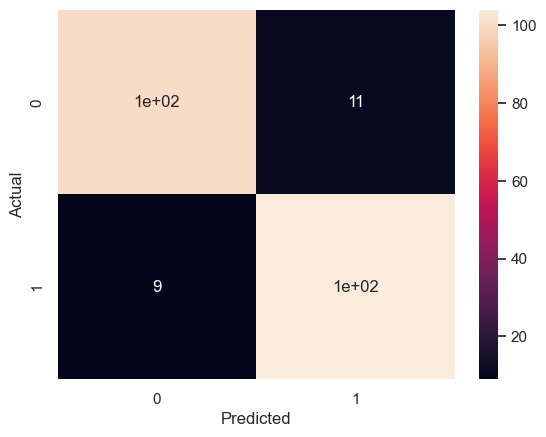

In [68]:
confusion_lr = confusion_matrix(y1_test, y3_pred)
sns.heatmap(confusion_lr, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [58]:
print(classification_report(y1_test, y4_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       111
           1       0.88      0.88      0.88       113

    accuracy                           0.88       224
   macro avg       0.87      0.87      0.87       224
weighted avg       0.88      0.88      0.88       224



In [59]:
print(classification_report(y1_test, y5_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       111
           1       0.86      0.87      0.86       113

    accuracy                           0.86       224
   macro avg       0.86      0.86      0.86       224
weighted avg       0.86      0.86      0.86       224



In [60]:
print(classification_report(y1_test, y6_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       111
           1       0.82      0.87      0.84       113

    accuracy                           0.84       224
   macro avg       0.84      0.84      0.84       224
weighted avg       0.84      0.84      0.84       224



- Observamos que o modelo de Suport Vector Machine com kernel rbf performa melhor que o modelo de Regressão Logística em todos os indicadores
- O modelo SVM inclusive erra menos que o modelo de RL
- Outros kernels de SVM se mostraram igual ou piores que os modelos de Regressão Logística